# Using Sparse Solvers in Python
## ChEN 6355 - Computational Fluid Dynamics
### Tony Saad <br/> Assistant Professor of Chemical Engineering <br/> University of Utah

We will solve the Poisson equation on the unit square with Dirichlet boundary conditions
\begin{equation}
\nabla^2 u = -S;\quad u(0) = 0,\quad u(1) = 0
\end{equation}
We will use a random number generator for the RHS.

In [36]:
import numpy as np
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pyamg # make sure you install pyamg

In [37]:
# 1d example
l = 1.0
ntotal = 34
dx = dy = 1/(ntotal -1)

n = 32 # interior points excludes BC points where the BC is specified
S = -np.random.rand(n)

Ae = 1/dx/dx*np.ones(n)
Aw = 1/dx/dx*np.ones(n)
Ap = -(Ae + Aw) # create Ap

# set BCs on east and west coefs
Ae[-1] = 0.0 # right wall
Aw[0] = 0.0 # left wall

# create the diagonals
d0 = Ap
de = Ae[:-1]
dw = Aw[1:]

A = scipy.sparse.diags([d0, de, dw], [0, 1, -1], format='csr')
print(A.toarray())

[[-2178.  1089.     0. ...     0.     0.     0.]
 [ 1089. -2178.  1089. ...     0.     0.     0.]
 [    0.  1089. -2178. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ... -2178.  1089.     0.]
 [    0.     0.     0. ...  1089. -2178.  1089.]
 [    0.     0.     0. ...     0.  1089. -2178.]]


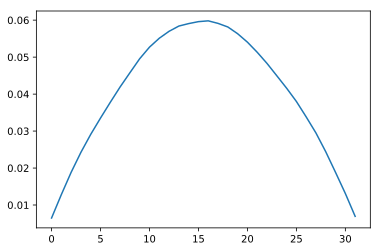

In [38]:
# direct solver
Ainv = scipy.sparse.linalg.inv(A.tocsc())
u = Ainv@S
plt.plot(u)
# to add the values at the boundary points you can augment u with two extra values

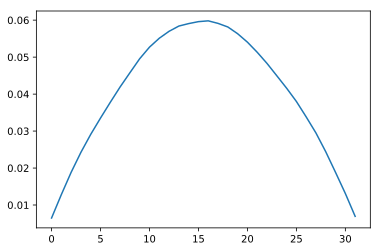

In [39]:
# scipy sparse solver
u = scipy.sparse.linalg.spsolve(A,S)
plt.plot(u)

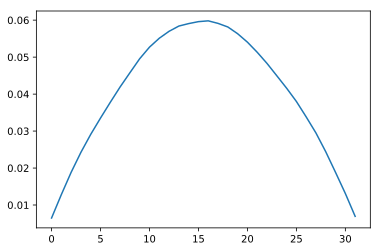

In [40]:
# cg solver
u,err = scipy.sparse.linalg.cg(A,S)
plt.plot(u)

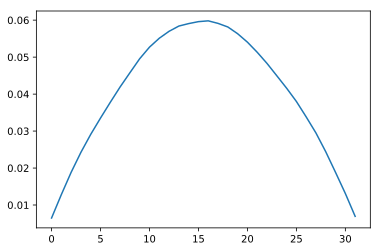

In [41]:
# amg solver
ml = pyamg.ruge_stuben_solver(A)                   
u = ml.solve(S, tol=1e-9,cycle='V')
plt.plot(u)

In [42]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()


